In [1]:
%matplotlib inline

In [2]:
from galsize_models.models import moster13_based_mock
mock = moster13_based_mock()
print("Number of model galaxies with logM* > {0:.1f} = {1:.2e}".format(np.log10(mock['mstar'].min()),len(mock)))

Number of model galaxies with logM* > 9.0 = 1.21e+06


In [5]:
from galsize_models.models import component_size_vs_rhalo

rvir = mock['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.15
size_seed=14041

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)
print(mock.keys())

['upid', 'mpeak', 'scale_factor_mpeak', 'x', 'y', 'z', 'zpeak', 'vmax_mpeak', 'mvir', 'scale_factor_firstacc', 'mvir_firstacc', 'halfmass_scale_factor', 'vx', 'vy', 'vz', 'rvir_zpeak', 'vmax_at_mpeak_percentile', 'mvir_host_halo', 'spin', 'uran', 'mstar', 'mstar_moster13', 'r50']


In [40]:
mpeak_mask1 = (mock['mpeak'] > 10**11.75) & (mock['mpeak'] < 10**12.)
mpeak_mask2 = (mock['mpeak'] > 10**12.75) & (mock['mpeak'] < 10**13.25)

cen_mask1 = mpeak_mask1 & (mock['upid'] == -1)
true_cen_mask1 = cen_mask1 & (mock['scale_factor_firstacc'] > 1)
bsp_cen_mask1 = cen_mask1 & (mock['scale_factor_firstacc'] < 0.9) 
sat_mask1 = mpeak_mask1  & (mock['upid'] != -1)

cen_mask2 = mpeak_mask2 & (mock['upid'] == -1)
true_cen_mask2 = cen_mask2 & (mock['scale_factor_firstacc'] > 1)
bsp_cen_mask2 = cen_mask2 & (mock['scale_factor_firstacc'] < 1)
sat_mask2 = mpeak_mask2  & (mock['upid'] != -1)

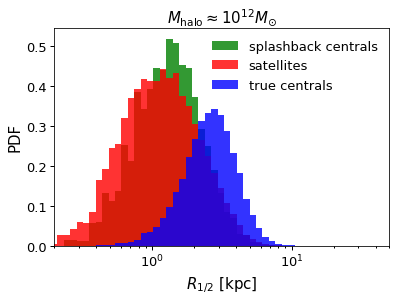

In [57]:
fig, ax = plt.subplots(1, 1)
xscale = ax.set_xscale('log')
xlim = ax.set_xlim(0.2, 50)

r50_bins1 = np.logspace(-1, 1.25, 50)
__=ax.hist(mock['r50'][bsp_cen_mask1], bins=r50_bins1, normed=True, alpha=0.8,
          color='green', label='splashback centrals')
__=ax.hist(mock['r50'][sat_mask1], bins=r50_bins1, normed=True, alpha=0.8,
          color='red', label='satellites')
__=ax.hist(mock['r50'][true_cen_mask1], bins=r50_bins1, normed=True, alpha=0.8,
          color='blue', label='true centrals')

leg = ax.legend(loc=1)
xlabel = ax.set_xlabel(r'$R_{1/2}$ $[{\rm kpc}]$')
ylabel = ax.set_ylabel(r'PDF')
title = ax.set_title(r'$M_{\rm halo} \approx 10^{12} M_{\odot}$')

figname = 'cen_sat_sizes.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

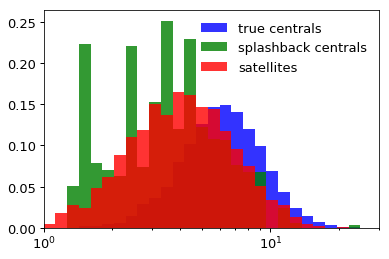

In [42]:
fig, ax = plt.subplots(1, 1)
xscale = ax.set_xscale('log')
xlim = ax.set_xlim(1, 30)

r50_bins2 = np.logspace(0, 1.5, 30)
__=ax.hist(mock['r50'][true_cen_mask2], bins=r50_bins2, normed=True, alpha=0.8,
          color='blue', label='true centrals')
__=ax.hist(mock['r50'][bsp_cen_mask2], bins=r50_bins2, normed=True, alpha=0.8,
          color='green', label='splashback centrals')
__=ax.hist(mock['r50'][sat_mask2], bins=r50_bins2, normed=True, alpha=0.8,
          color='red', label='satellites')

leg = ax.legend()
